<a href="https://colab.research.google.com/github/redballsy/PDAC-Early-Detection/blob/main/TP073587_CP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Installers and Libraries**

In [ ]:
!pip install scikit-learn

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Libraries for analysis preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Machine Learning Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


# **Mount the dataset**

In [ ]:
from google.colab import drive
# Mounting Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Load the dataset and observations**

In [ ]:
# Load dataset
pdac = pd.read_csv('/content/drive/MyDrive/pdac.csv')

In [ ]:
pdac

,sample_id,patient_cohort,sample_origin,age,sex,diagnosis,stage,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,S497,Cohort1,ESP,81.0,F,3.0,I,NaN,0.56550,12.017150,431.422530,874.099700,NaN
2,S456,Cohort1,LIV,57.0,M,3.0,IA,10.0,1.73043,2.628425,40.620818,529.984000,155.270
3,S520,Cohort1,BPTB,55.0,M,3.0,IA,11.0,0.47502,2.830541,33.406150,323.175770,210.185
4,S573,Cohort2,BPTB,58.0,M,3.0,IA,11.0,0.44109,0.632433,188.253000,138.630000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,S549,Cohort2,BPTB,68.0,M,3.0,IV,NaN,0.52026,7.058209,156.241000,525.178000,NaN
196,S558,Cohort2,BPTB,71.0,F,3.0,IV,NaN,0.85956,8.341207,16.915000,245.947000,NaN
197,S560,Cohort2,BPTB,63.0,M,3.0,IV,NaN,1.36851,7.674707,289.701000,537.286000,NaN
198,S583,Cohort2,BPTB,75.0,F,3.0,IV,NaN,1.33458,8.206777,205.930000,722.523000,NaN


In [ ]:

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(pdac.head())

First few rows of the dataset:
  sample_id patient_cohort sample_origin   age  sex  diagnosis stage  \
0       NaN            NaN           NaN   NaN  NaN        NaN   NaN   
1      S497        Cohort1           ESP  81.0    F        3.0     I   
2      S456        Cohort1           LIV  57.0    M        3.0    IA   
3      S520        Cohort1          BPTB  55.0    M        3.0    IA   
4      S573        Cohort2          BPTB  58.0    M        3.0    IA   

   plasma_CA19_9  creatinine      LYVE1       REG1B       TFF1    REG1A  
0            NaN         NaN        NaN         NaN        NaN      NaN  
1            NaN     0.56550  12.017150  431.422530  874.09970      NaN  
2           10.0     1.73043   2.628425   40.620818  529.98400  155.270  
3           11.0     0.47502   2.830541   33.406150  323.17577  210.185  
4           11.0     0.44109   0.632433  188.253000  138.63000      NaN  


In [ ]:
pdac.columns

Index(['sample_id', 'patient_cohort', 'sample_origin', 'age', 'sex',
       'diagnosis', 'stage', 'plasma_CA19_9', 'creatinine', 'LYVE1', 'REG1B',
       'TFF1', 'REG1A'],
      dtype='object')

In [ ]:
# Number of rows
len(pdac.columns)

13

In [ ]:
# Nnumber of distinct rows
num_distinct_rows = len(pdac.drop_duplicates())
# Print the result
print(f"Number of distinct rows: {num_distinct_rows}")

Number of distinct rows: 199


# **Visualize Distribution and Outliers using Histogram and Box Plot**

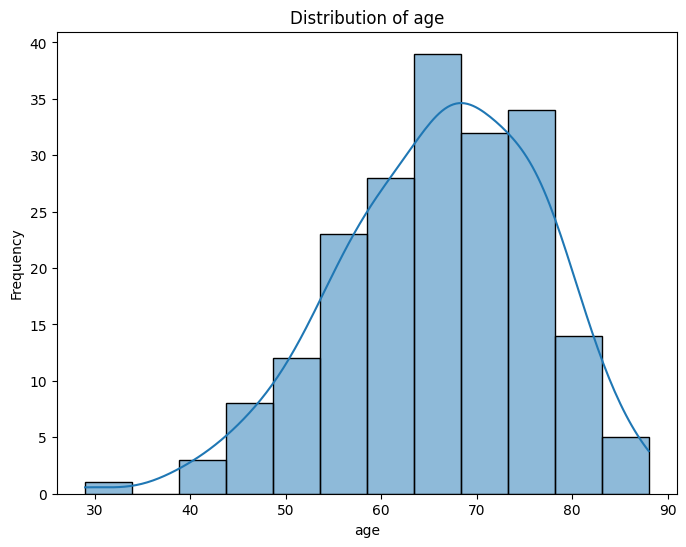

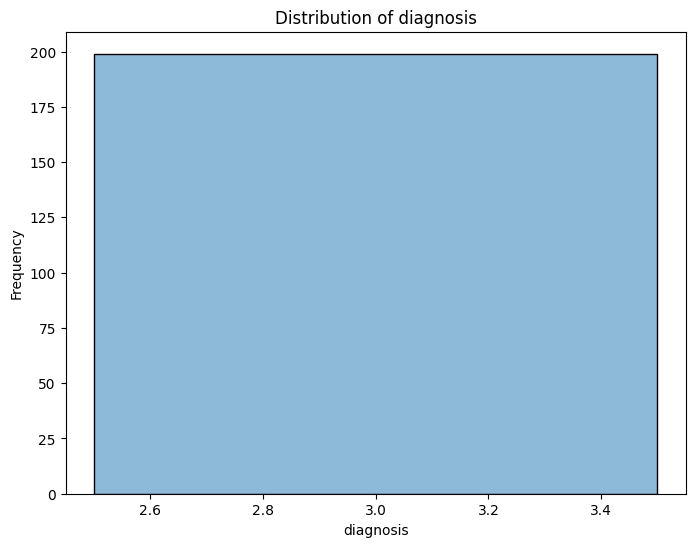

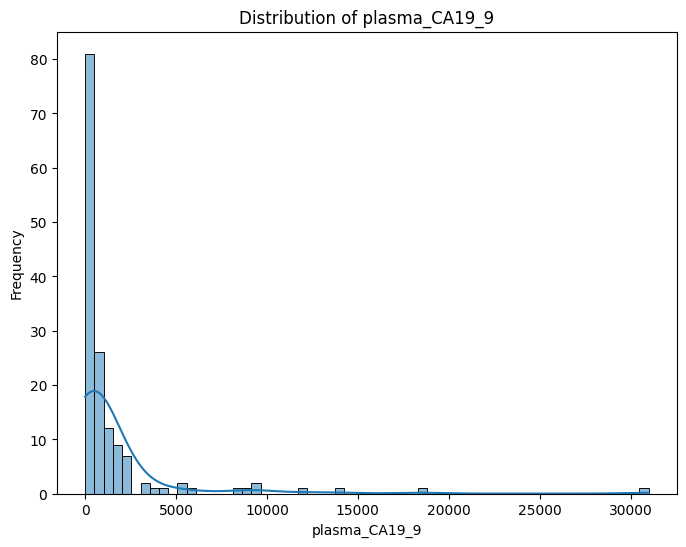

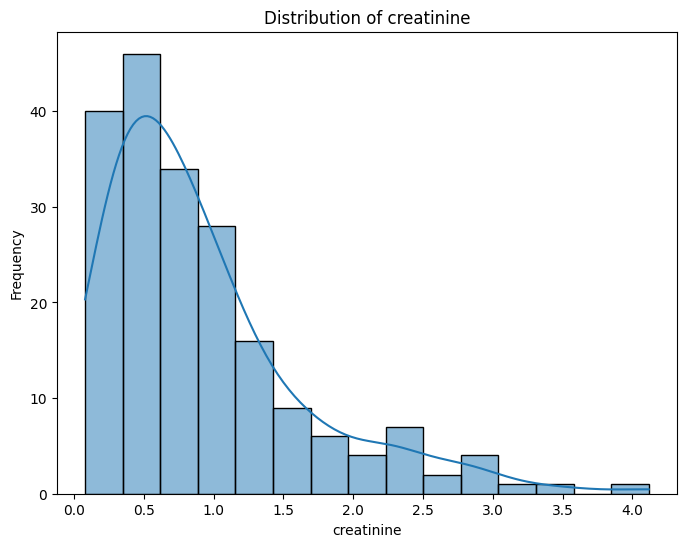

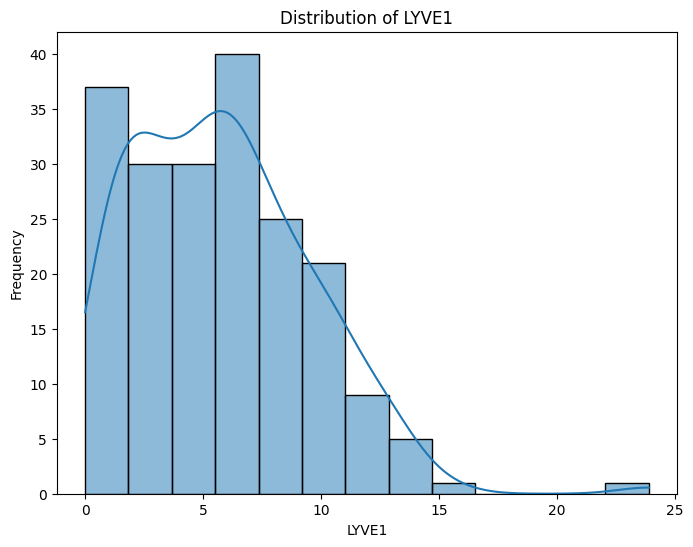

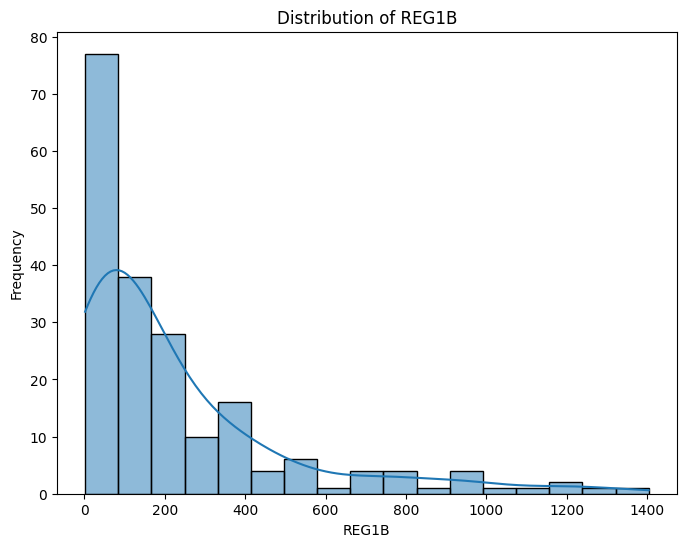

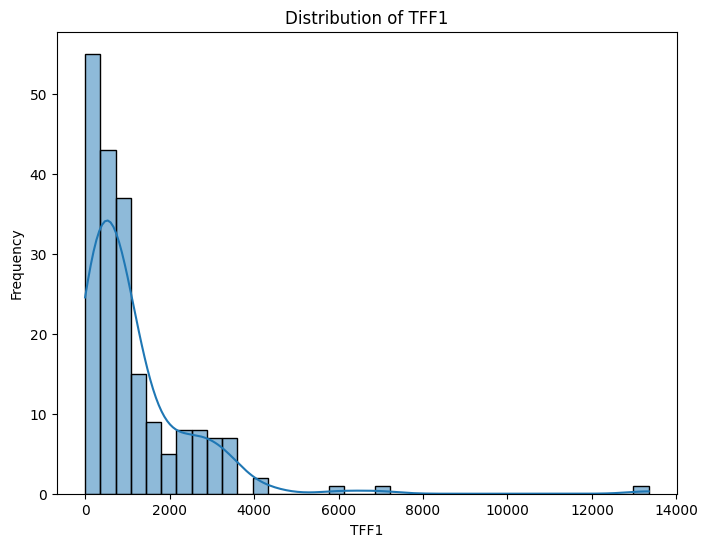

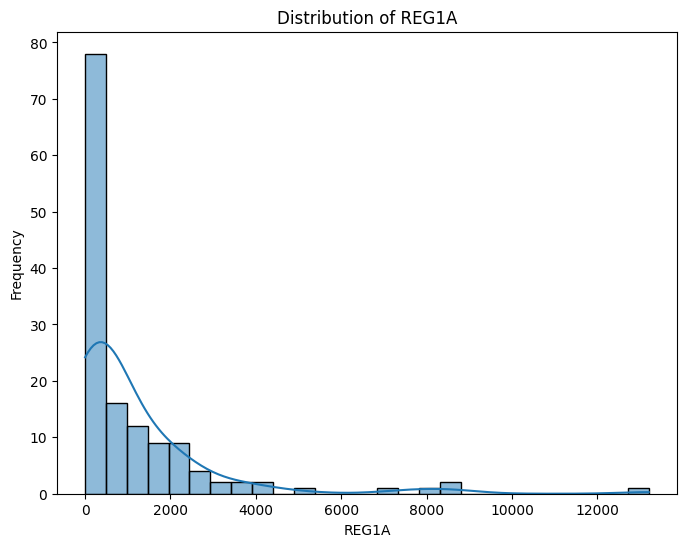

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


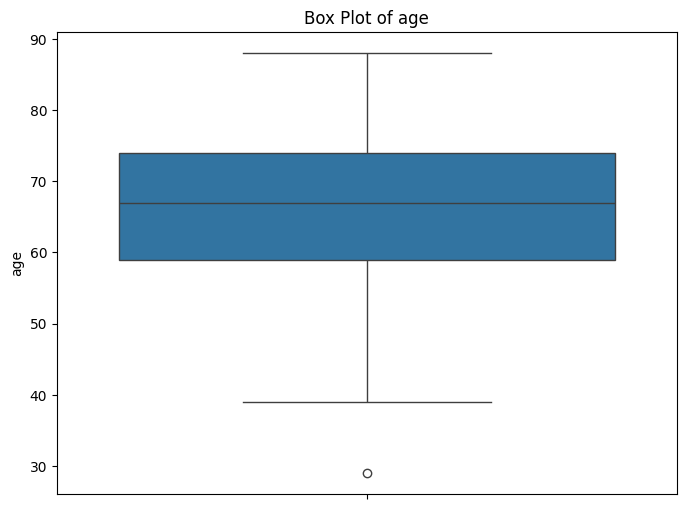

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


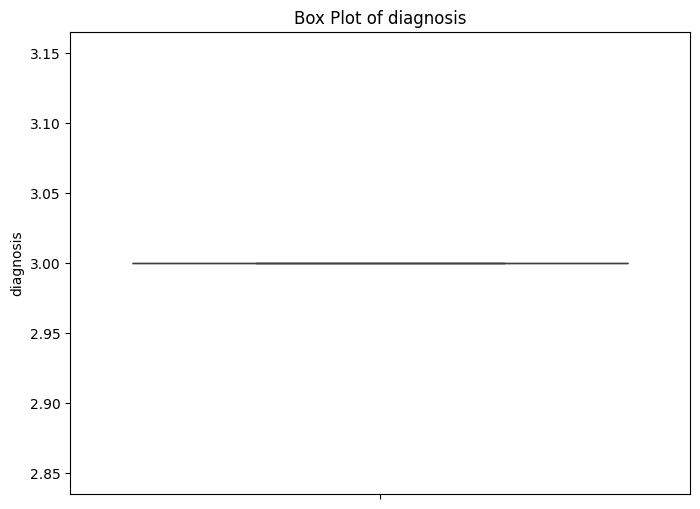

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


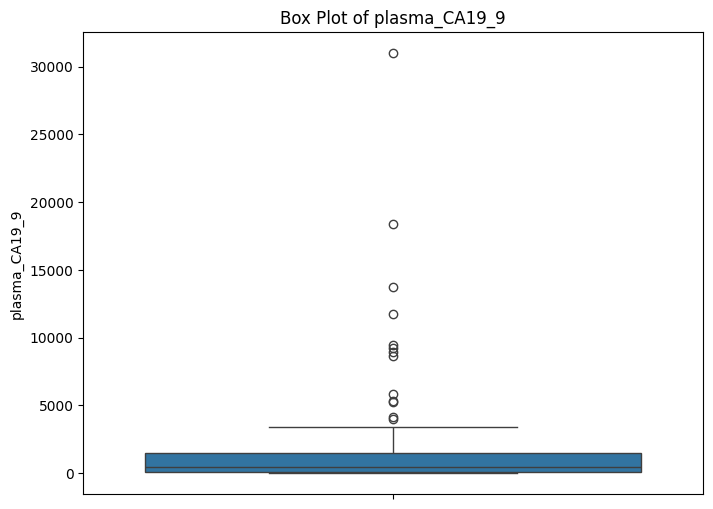

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


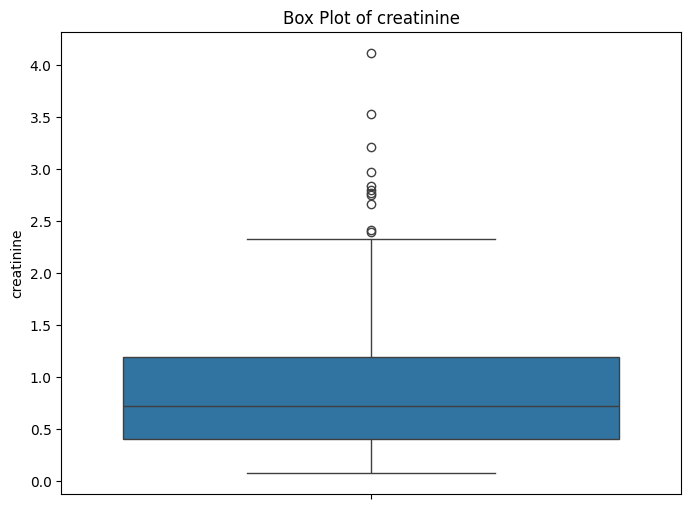

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


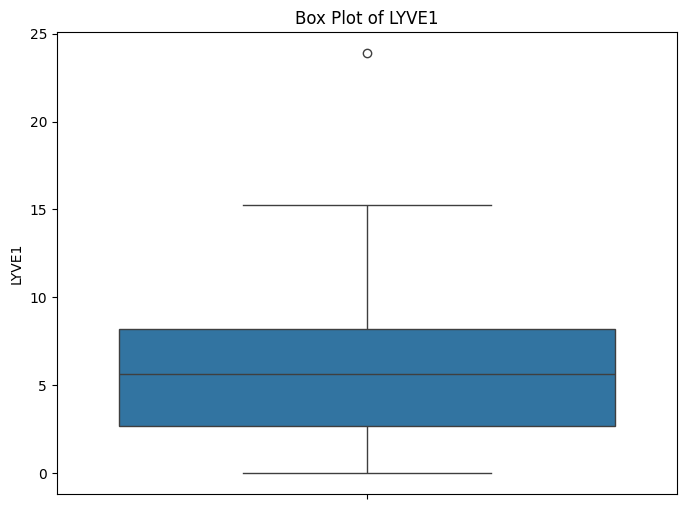

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


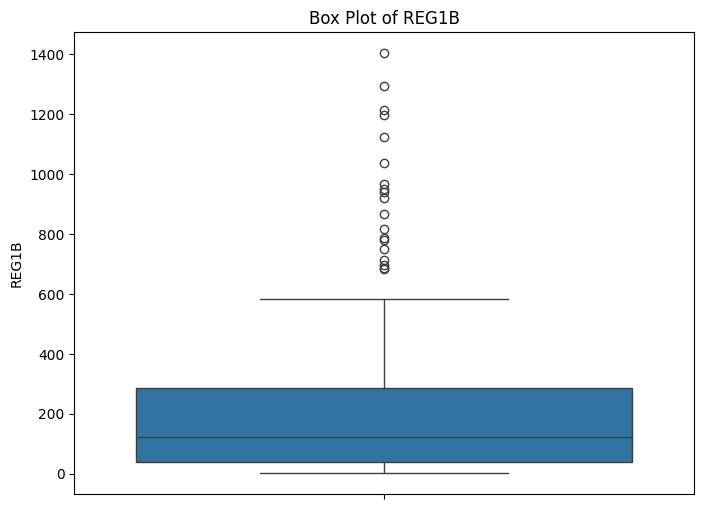

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


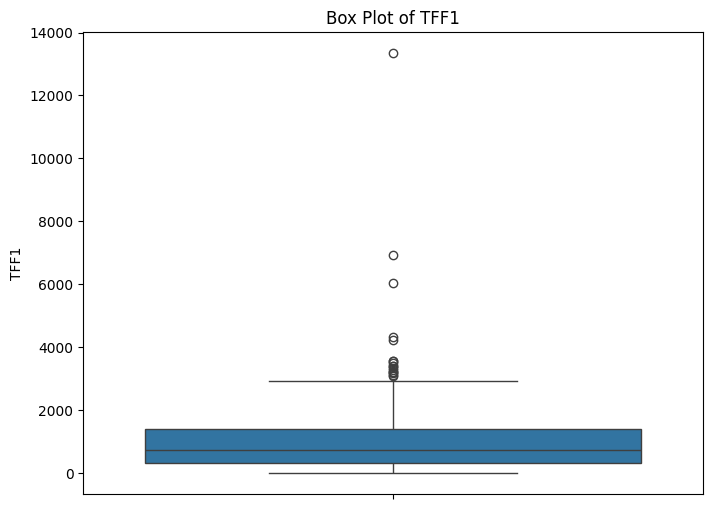

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


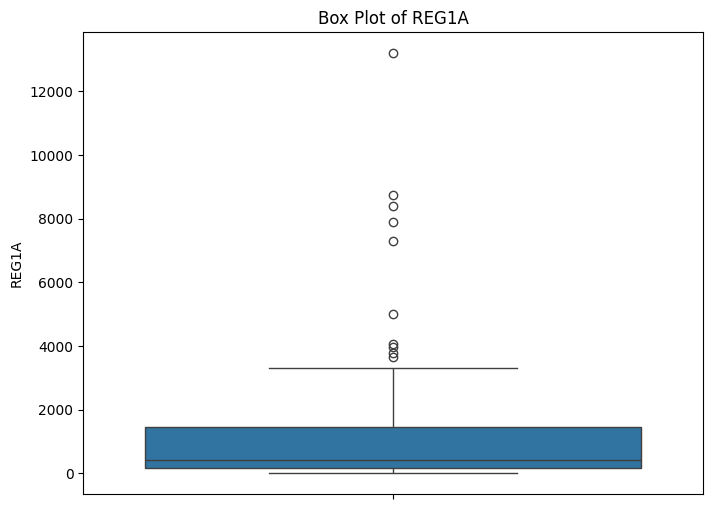

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns



# Select numeric columns
numeric_cols = pdac.select_dtypes(include=['number']).columns

# Plot histograms for each numeric feature
for col in numeric_cols:
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    sns.histplot(pdac[col], kde=True)  # kde=True adds a kernel density estimate
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# box plots for numeric features
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=pdac[col])  # Use 'y' for vertical box plot
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.show()

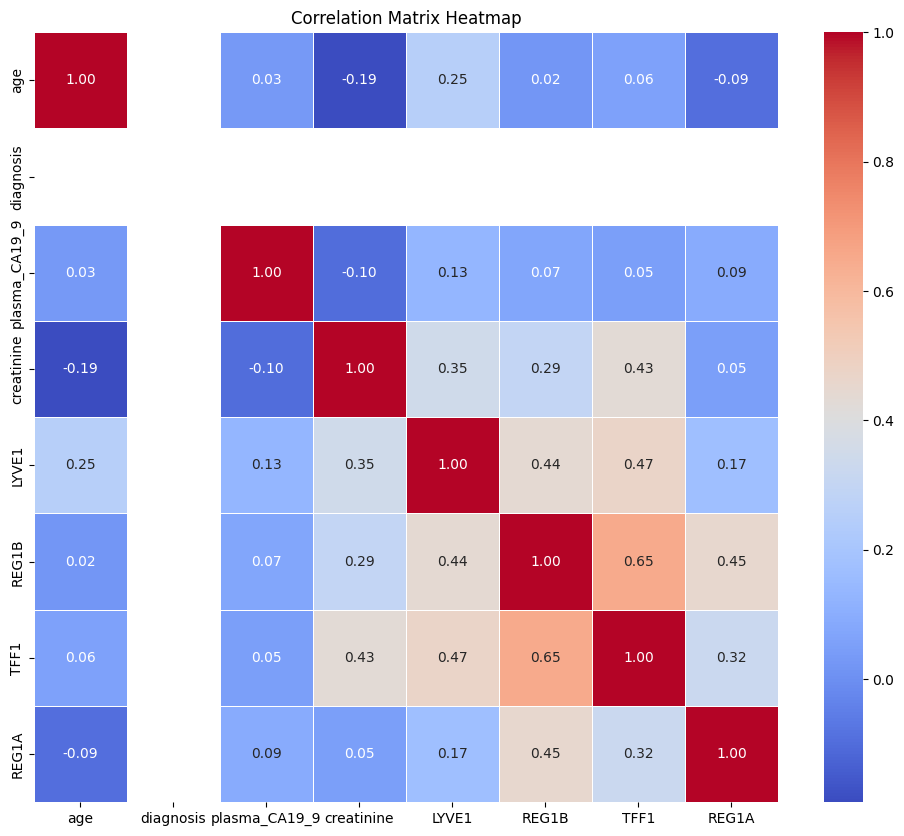

In [ ]:
# Calculate correlation matrix, only including numeric columns
corr_matrix = pdac.select_dtypes(include=np.number).corr()
# pdac.select_dtypes(include=np.number) selects only columns with numeric data types

# Create heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

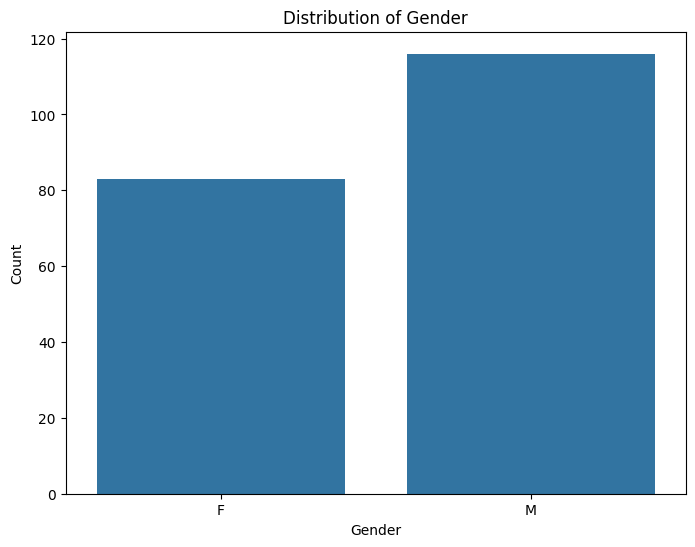

In [ ]:
# countplot to show the distribution of gender
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.countplot(x='sex', data=pdac)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


In [ ]:
# Check for missing values
print("\nMissing values in each column:")
print(pdac.isnull().sum())


Missing values in each column:
sample_id          1
patient_cohort     1
sample_origin      1
age                1
sex                1
diagnosis          1
stage              1
plasma_CA19_9     50
creatinine         1
LYVE1              1
REG1B              1
TFF1               1
REG1A             60
dtype: int64


# **Missing value visualization**

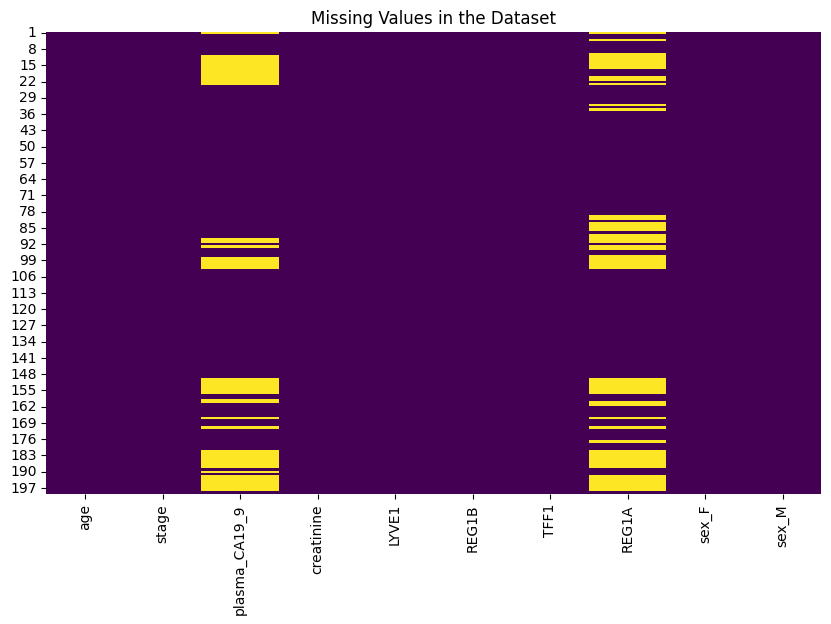

In [ ]:
# Visualize missing values
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(pdac.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values in the Dataset")
plt.show()

# **Data cleansing**

In [ ]:
# Deletion of the first row as it is empty
pdac = pdac.iloc[1:]

In [ ]:
# Replace Missing Values with Mean for numeric columns only
for col in pdac.select_dtypes(include=['number']):
    pdac[col].fillna(pdac[col].mean(), inplace=True)

<ipython-input-8-b65d8ec9bb56>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pdac[col].fillna(pdac[col].mean(), inplace=True)


Verification of first row deletion

In [ ]:
# Check for missing values
print("\nMissing values in each column:")
print(pdac.isna().sum())


Missing values in each column:
sample_id         0
patient_cohort    0
sample_origin     0
age               0
sex               0
diagnosis         0
stage             0
plasma_CA19_9     0
creatinine        0
LYVE1             0
REG1B             0
TFF1              0
REG1A             0
dtype: int64


# **Remove the irrelevant columns**

In [ ]:
pdac = pdac.drop('sample_id', axis=1)

In [ ]:
# Remove the 'diagnosis' column
pdac = pdac.drop('diagnosis', axis=1)

In [ ]:
pdac = pdac.drop('patient_cohort', axis=1)
pdac = pdac.drop('sample_origin', axis=1)

Verification of the column removed

In [ ]:
pdac.columns

Index(['age', 'sex', 'stage', 'plasma_CA19_9', 'creatinine', 'LYVE1', 'REG1B',
       'TFF1', 'REG1A'],
      dtype='object')

In [ ]:
pdac.head()

,age,stage,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A,sex_F,sex_M
1,81,I,1476.154733,0.56550,12.017150,431.422530,874.099700,1138.323721,1,0
2,57,IA,10.000000,1.73043,2.628425,40.620818,529.984000,155.270000,0,1
3,55,IA,11.000000,0.47502,2.830541,33.406150,323.175770,210.185000,0,1
4,58,IA,11.000000,0.44109,0.632433,188.253000,138.630000,1138.323721,0,1
5,73,IB,3236.000000,0.70122,12.245820,196.921830,1529.183124,432.917000,0,1


In [ ]:
pdac['age'] = pdac['age'].astype('int')

In [ ]:
# Encode categorical variables
pdac = pd.get_dummies(pdac, columns=['sex'], dtype=int)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'stage' column
pdac['stage'] = label_encoder.fit_transform(pdac['stage'])

In [ ]:
pdac['stage']

,stage
1,0
2,1
3,1
4,1
5,2
...,...
195,7
196,7
197,7
198,7


In [ ]:
pdac['stage'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7])

In [ ]:
pdac.head()

,age,stage,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A,sex_F,sex_M
1,81,0,1476.154733,0.56550,12.017150,431.422530,874.099700,1138.323721,1,0
2,57,1,10.000000,1.73043,2.628425,40.620818,529.984000,155.270000,0,1
3,55,1,11.000000,0.47502,2.830541,33.406150,323.175770,210.185000,0,1
4,58,1,11.000000,0.44109,0.632433,188.253000,138.630000,1138.323721,0,1
5,73,2,3236.000000,0.70122,12.245820,196.921830,1529.183124,432.917000,0,1


In [ ]:
# Split data into features (X) and target variable (y)
X = pdac.drop("stage", axis=1)
y = pdac["stage"]


In [ ]:
# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (159, 8)
y_train shape (159,)
X_test shape (40, 8)
y_test shape (40,)


In [ ]:
y_train

,stage
184,7
39,5
25,4
143,6
142,6
...,...
107,6
15,2
93,5
180,7


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

#RandomForestClassifier in your pipeline
pipeline = Pipeline([
    ('rf', RandomForestClassifier())  # Replace with your desired estimator
])

# Grid of parameters to search
param_grid = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [None, 5, 10, 20],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__max_features': ['sqrt', 'log2', None]
}

# Create the grid search object
grid_search = GridSearchCV(pipeline, param_grid, cv=10)
# Fit the grid search object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Select the best model
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_predrf = best_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Best parameters:  {'rf__max_depth': 20, 'rf__max_features': None, 'rf__min_samples_leaf': 4, 'rf__min_samples_split': 5, 'rf__n_estimators': 300}
Best score:  0.4333333333333333


Accuracy: 0.4
Confusion Matrix:
[[0 0 0 1 1 0]
 [0 0 0 0 1 1]
 [0 0 0 1 0 0]
 [0 0 0 8 9 0]
 [1 0 0 6 8 0]
 [0 0 0 1 2 0]]
Classification Report:
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1
           5       0.47      0.47      0.47        17
           6       0.38      0.53      0.44        15
           7       0.00      0.00      0.00         3

    accuracy                           0.40        40
   macro avg       0.14      0.17      0.15        40
weighted avg       0.34      0.40      0.37        40



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


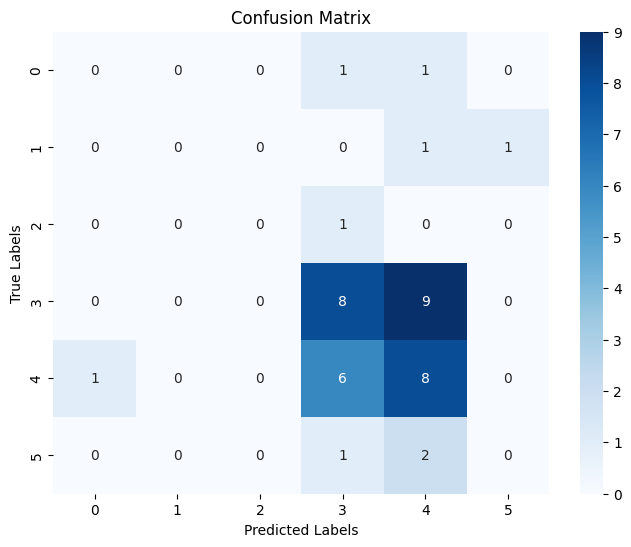

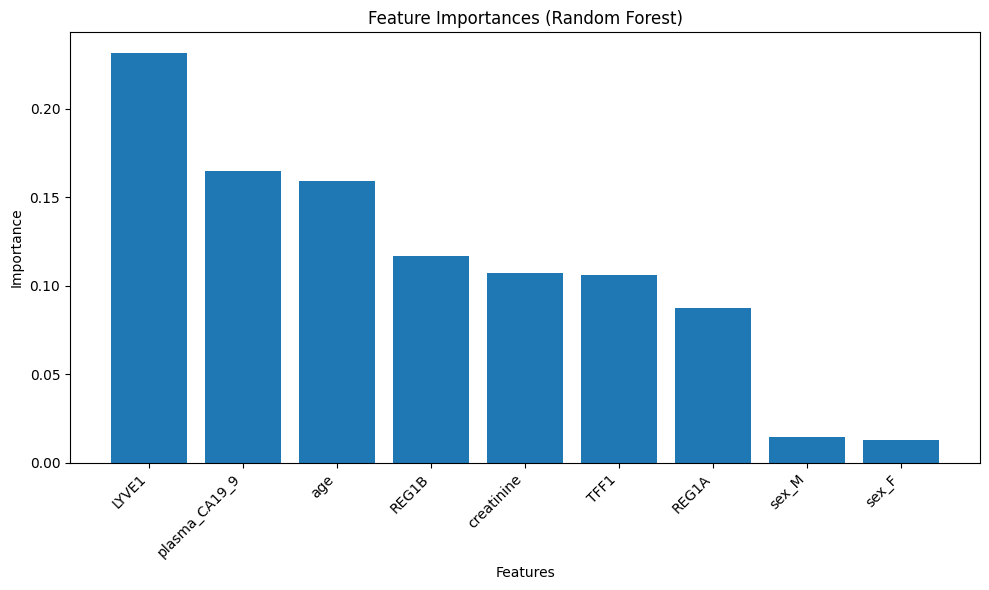

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, mean_squared_error, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt

#y_test and y_pred are your true and predicted labels

# Accuracy
accuracy = accuracy_score(y_test, y_predrf)
print("Accuracy:", accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_predrf)
print("Confusion Matrix:")
print(cm)

# Precision, Recall, F1-Score
report = classification_report(y_test,y_predrf)
print("Classification Report:")
print(report)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# X_train is a DataFrame, so we retrieve feature names
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f"Feature {i}" for i in range(X_train.shape[1])]

# Get feature importances from the best model
# This line is added to extract feature importances
importances = best_model.named_steps['rf'].feature_importances_

# Sort the feature importances in descending order and get indices
sorted_indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Random Forest)")
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), np.array(feature_names)[sorted_indices], rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error

#SVM model with limited max iterations
svm = SVC(max_iter=500)  # Limit iterations to speed up the process

# Define a reduced parameter grid to further decrease training time
param_grid = {
    'C': [0.1, 1],  # Reduced options for C
    'gamma': [0.1, 0.01],  # Reduced options for gamma
    'kernel': ['rbf']  # Using only 'rbf' kernel to simplify
}

#RandomizedSearchCV with fewer iterations to reduce search space
random_search = RandomizedSearchCV(
    svm, param_distributions=param_grid, n_iter=2, scoring='accuracy', n_jobs=-1, random_state=42
)

# Fit the RandomizedSearchCV to the data
random_search.fit(X_train, y_train)

# Print the best parameters and the best score on training data
print("Best Parameters:", random_search.best_params_)
print("Best Score on Training Data:", random_search.best_score_)

# Select the best model found during random search
best_model = random_search.best_estimator_

# Make predictions with the best model
y_predsvc = best_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'kernel': 'rbf', 'gamma': 0.01, 'C': 0.1}
Best Score on Training Data: 0.3838709677419355


Test Accuracy: 0.375
Confusion Matrix:
[[ 0  0  0  0  2  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0 17  0]
 [ 0  0  0  0 15  0]
 [ 0  0  0  0  3  0]]
Classification Report:
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00        17
           6       0.38      1.00      0.55        15
           7       0.00      0.00      0.00         3

    accuracy                           0.38        40
   macro avg       0.06      0.17      0.09        40
weighted avg       0.14      0.38      0.20        40



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


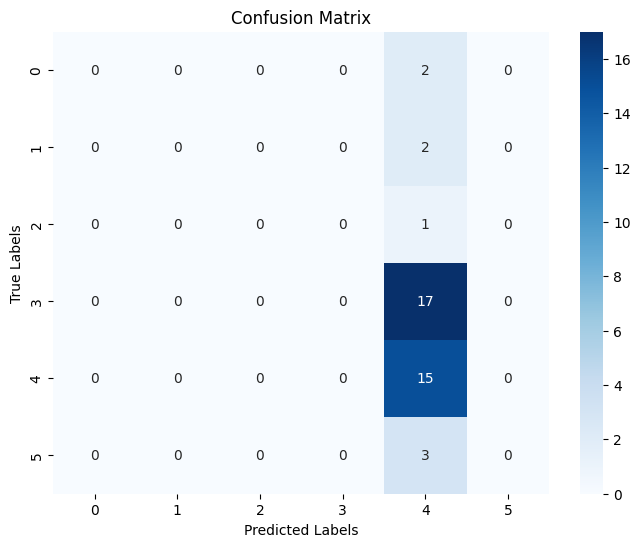

In [ ]:
# y_test and y_pred are your true and predicted labels

# Accuracy
accuracy = accuracy_score(y_test, y_predsvc)
print("Test Accuracy:", accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_predsvc)
print("Confusion Matrix:")
print(cm)

# Precision, Recall, F1-Score
report = classification_report(y_test,y_predsvc)
print("Classification Report:")
print(report)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()




In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score


# Fix class labels: we nsure all labels start from 0
if min(y) != 0:
    y = y - min(y)


# XGBoost model (without use_label_encoder parameter)
xgb = XGBClassifier(eval_metric='logloss')

# Define parameter grid
param_grid = {
    'n_estimators': [100, 300],
    'learning_rate': [0.01, 0.1, 0.2],
}

# GridSearchCV object with StratifiedKFold
grid_search = GridSearchCV(xgb, param_grid, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(X, y)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)


# Evaluate on test set
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
6 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 726, in inner_f
    return func(**kwargs)
  File "/usr/l

Best Parameters: {'learning_rate': 0.01, 'n_estimators': 100}
Test Set Accuracy: 0.95


Test Accuracy: 0.95
Confusion Matrix:
[[ 1  0  0  0  1  0]
 [ 0  2  0  0  0  0]
 [ 0  0  1  0  0  0]
 [ 0  0  0 17  0  0]
 [ 0  0  0  0 15  0]
 [ 0  0  0  0  1  2]]
Classification Report:
              precision    recall  f1-score   support

           2       1.00      0.50      0.67         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00        17
           6       0.88      1.00      0.94        15
           7       1.00      0.67      0.80         3

    accuracy                           0.95        40
   macro avg       0.98      0.86      0.90        40
weighted avg       0.96      0.95      0.94        40



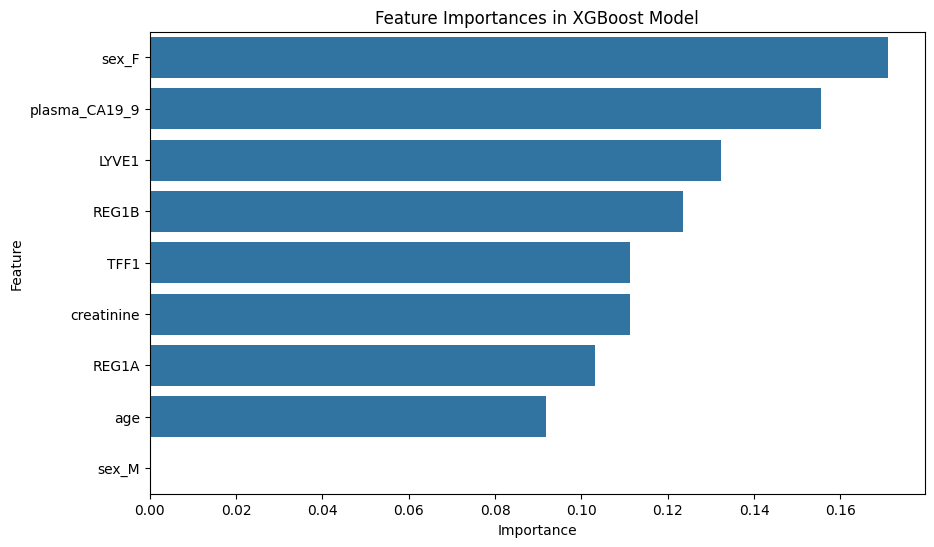

In [ ]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Precision, Recall, F1-Score
report = classification_report(y_test,y_pred)
print("Classification Report:")
print(report)


# Get feature importances
feature_importance = grid_search.best_estimator_.feature_importances_

# Create a dataframe for visualization
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort by importance
importance_df = importance_df.sort_values('Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances in XGBoost Model')
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Create a pipeline with Decision Tree
pipeline_dt = Pipeline([
    ('dt', DecisionTreeClassifier())  # Decision Tree Classifier
])

# Grid of parameters for Decision Tree
param_grid_dt = {
    'dt__criterion': ['gini', 'entropy'],
    'dt__splitter': ['best', 'random'],
    'dt__max_depth': [None, 5, 10, 15, 20],
    'dt__min_samples_split': [2, 5, 10],
    'dt__min_samples_leaf': [1, 2, 4]
}

# Grid Search CV
grid_search_dt = GridSearchCV(pipeline_dt, param_grid_dt, cv=10)
grid_search_dt.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters (Decision Tree):", grid_search_dt.best_params_)
print("Best score (Decision Tree):", grid_search_dt.best_score_)

# Get the best model
best_model_dt = grid_search_dt.best_estimator_

# Predict and evaluate on the test set
y_pred_dt = best_model_dt.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Best parameters (Decision Tree): {'dt__criterion': 'entropy', 'dt__max_depth': 15, 'dt__min_samples_leaf': 4, 'dt__min_samples_split': 10, 'dt__splitter': 'random'}
Best score (Decision Tree): 0.3904166666666667


Test Accuracy: 0.4
Confusion Matrix:
[[1 0 0 1 0 0]
 [0 0 0 1 0 1]
 [0 0 0 0 1 0]
 [0 0 0 7 7 3]
 [0 0 0 3 8 4]
 [0 0 0 2 1 0]]
Classification Report:
              precision    recall  f1-score   support

           2       1.00      0.50      0.67         2
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1
           5       0.50      0.41      0.45        17
           6       0.47      0.53      0.50        15
           7       0.00      0.00      0.00         3

    accuracy                           0.40        40
   macro avg       0.33      0.24      0.27        40
weighted avg       0.44      0.40      0.41        40



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


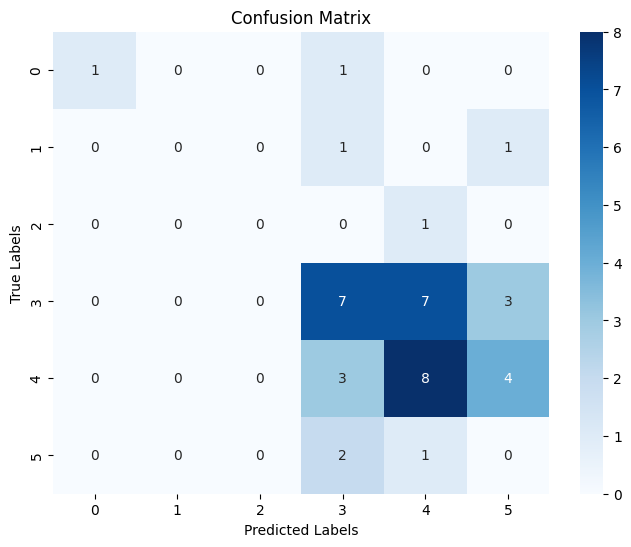

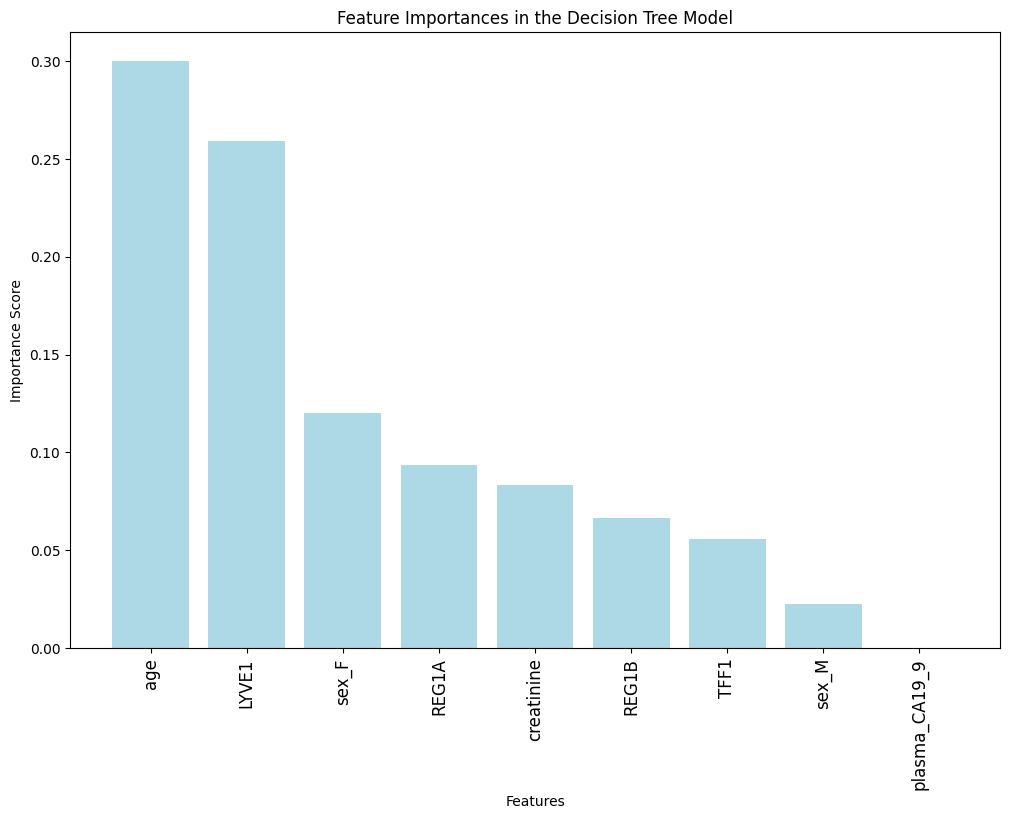

In [ ]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred_dt)
print("Test Accuracy:", accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix:")
print(cm)

# Precision, Recall, F1-Score
report = classification_report(y_test,y_pred_dt)
print("Classification Report:")
print(report)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# X_train has the feature names in the correct order
# If feature names are not present, create a list of feature names like:
# feature_names = ['Feature1', 'Feature2', ..., 'FeatureN']
feature_names = X_train.columns  # Replace with your feature names if they are not in a DataFrame

# Get feature importances from the best Decision Tree model
feature_importances = best_model_dt.named_steps['dt'].feature_importances_

# Sort the feature importances and corresponding feature names
indices = np.argsort(feature_importances)[::-1]
sorted_features = feature_names[indices]
sorted_importances = feature_importances[indices]

# Plotting the feature importances
plt.figure(figsize=(12, 8))
plt.bar(range(len(sorted_importances)), sorted_importances, color='lightblue', align='center')
plt.xticks(range(len(sorted_importances)), sorted_features, rotation=90, fontsize=12)
plt.title('Feature Importances in the Decision Tree Model')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()
